#### Image Manipulation

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import math
from PIL import Image


## Problem 1


In [5]:
def p1_checker(fname, m, n):

    #open img
    img = mpimg.imread(fname)
    
    # cropped centered to make it square 
    img_size = min(img.shape[0], img.shape[1])
    x = (img.shape[0] - img_size)//2
    y = (img.shape[0] - img_size)//2
    img_cropped = img[x:img.shape[0]-x, y:img.shape[1]-y]

    #resize img to mxm
    pil_img = Image.fromarray(img_cropped)
    pil_img = pil_img.resize((m, m))

    #form 2mx2m img tiles
    im_tile = Image.new('RGB', (2*m,2*m))
    im_tile.paste(pil_img, (0,0))
    im_tile.paste(pil_img.rotate(90), (0,m))
    im_tile.paste(pil_img.rotate(270), (m,0))
    im_tile.paste(pil_img.rotate(180), (m,m))

    #make 2nm × 2nm pixels img
    im_final = Image.new('RGB', (2*m*n,2*m*n))
    for i in range(0, 2*m*n, 2*m):
        for j in range(0, 2*m*n, 2*m):
            im_final.paste(im_tile, (i,j))
    
    # plot img
    print("Final shape is", im_final.size)
    im_final = np.array(im_final)
    plt.axis('off')
    plt.imshow(im_final)
    
    # display(im_final)    


Final shape is (400, 400)


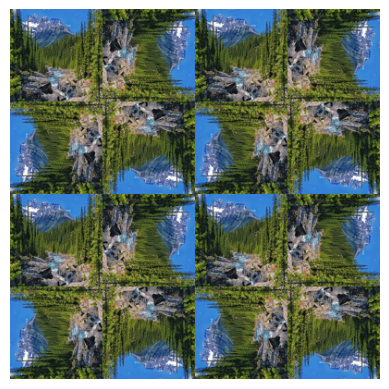

In [6]:
fn = './images/mountain.jpg'
m = 100
n = 2

p1_checker(fn, m, n)

Final shape is (1024, 1024)


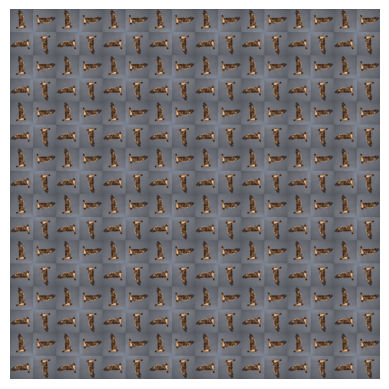

In [7]:
fn = './images/eagle.jpg'
m = 64
n = 8

p1_checker(fn, m, n)

## Problem 2



In [8]:
def p2_vignette(fn, r0, c0):
    
    image = mpimg.imread(fn)
    M, N, _ = image.shape

    # a) maximum distance
    dm = np.sqrt(np.maximum(r0, M-1-r0)**2 + np.maximum(c0, N-1-c0)**2)

    # b) distance array
    i, j = np.ogrid[:M, :N]
    D = np.sqrt((i-r0)**2 + (j-c0)**2)

    # c) weight array
    W = 1 - np.sqrt(D/dm)
    W = np.expand_dims(W, axis=-1)

    # d) multiply input image by W
    I = W * image
    I = np.array(I, dtype=int)

    print("d_m = {:.1f}".format(dm))
    print(f'W[{M//4}][{N//4}] = {W[M//4][N//4][0]:.2f}')
    print(f'W[{M//4}][{3*N//4}] = {W[M//4][3*N//4][0]:.2f}')
    print(f'W[{3*M//4}][{N//4}] = {W[3*M//4][N//4][0]:.2f}')
    print(f'W[{3*M//4}][{3*N//4}] = {W[3*M//4][3*N//4][0]:.2f}')
    #rgb
    print(f'I[{M//4}][{N//4}] = {I[M//4][N//4]}')
    print(f'I[{M//4}][{3*N//4}] = {I[M//4][3*N//4]}')
    print(f'I[{3*M//4}][{N//4}] = {I[3*M//4][N//4]}')
    print(f'I[{3*M//4}][{3*N//4}] = {I[3*M//4][3*N//4]}')

    #e) display
    plt.axis('off')
    plt.imshow(I)
    plt.show()

    
    

d_m = 223.6
W[42][75] = 0.21
W[42][225] = 0.47
W[126][75] = 0.24
W[126][225] = 0.60
I[42][75] = [12 17 34]
I[42][225] = [32 56 79]
I[126][75] = [27 26 21]
I[126][225] = [74 81 41]


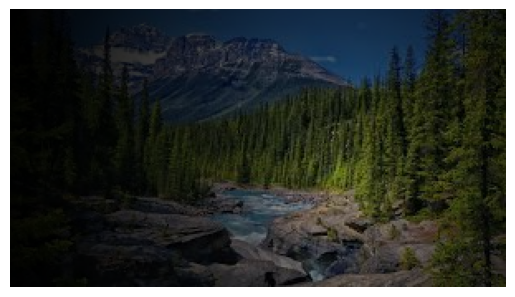

In [9]:
fn = "./images/mountain.jpg"
r0 = 100
c0 = 200

p2_vignette(fn, r0, c0)

d_m = 335.0
W[85][128] = 0.38
W[85][384] = 0.35
W[255][128] = 0.28
W[255][384] = 0.26
I[85][128] = [86 87 88]
I[85][384] = [82 82 83]
I[255][128] = [41 39 36]
I[255][384] = [3 3 6]


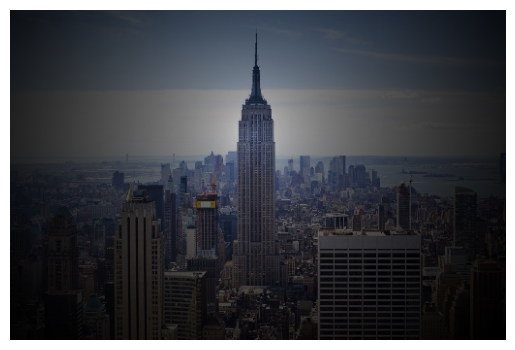

In [10]:
fn = "./images/skyline.jpg"
r0 = 130
c0 = 250

p2_vignette(fn, r0, c0)

## Problem 3


In [11]:
#mxn downsized img
#b: size of blocks replacing downsized pixel
#result img: mbxnb
def p3_block(fn, m, n, b):
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    M, N = img.shape
    
    # a) downsize image - avg intensity 
    sm = M/m
    sn = N/n
    img_downsized = np.zeros((m,n), dtype=float)
    for i in range(m):
        for j in range(n):
            r1, r2 = round(i * sm), round((i + 1) * sm)
            c1, c2 = round(j * sn), round((j + 1) * sn)
            img_downsized[i,j] = np.mean(img[r1:r2,c1:c2])

    #b) expand pixels into larger blocks of same intensity
    img_block = np.zeros((m,n))
    median = np.median(img_downsized)
    for i in range(m):
        for j in range(n):
            if img_downsized[i][j] >= median :
                img_block[i,j] = 255
    

    #c) binary img version and make block version
    img_block_binary = np.kron(img_block, np.ones((b, b)))


    # print  
    print(f'Downsized images are {img_downsized.shape}')
    print(f'Block images are {img_block_binary.shape}')

    print(f'Average intensity at {(m // 4, n // 4)}: {img_downsized[m//4][n//4]:.1f}')
    print(f'Average intensity at {(m // 4, 3*n // 4)}: {img_downsized[m//4][3*n//4]:.1f}')
    print(f'Average intensity at {(3*m // 4, n // 4)}: {img_downsized[3*m//4][n//4]:.1f}')
    print(f'Average intensity at {(3*m // 4, 3*n // 4)}: {img_downsized[3*m//4][3*n//4]:.1f}')
    print(f'Binary threshold: {median:.1f}')

    plt.axis("off")
    plt.imshow(img_downsized, cmap = plt.cm.gray)
    plt.show()
    plt.axis("off")
    plt.imshow(img_block_binary, cmap = plt.cm.gray)
    plt.show()


Downsized images are (25, 18)
Block images are (375, 270)
Average intensity at (6, 4): 59.2
Average intensity at (6, 13): 55.5
Average intensity at (18, 4): 158.3
Average intensity at (18, 13): 35.3
Binary threshold: 134.7


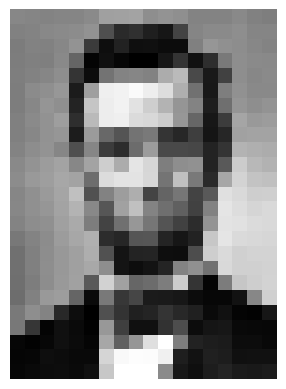

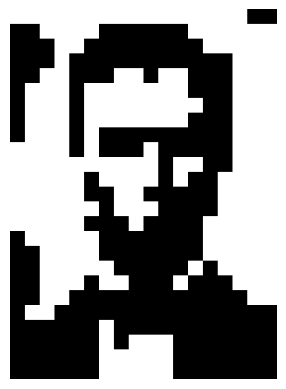

In [12]:
fname = "./images/lincoln1.jpg"
m = 25
n = 18
b = 15

p3_block(fname, m, n, b)

Downsized images are (30, 16)
Block images are (420, 224)
Average intensity at (7, 4): 22.0
Average intensity at (7, 12): 27.1
Average intensity at (22, 4): 15.1
Average intensity at (22, 12): 27.3
Binary threshold: 27.7


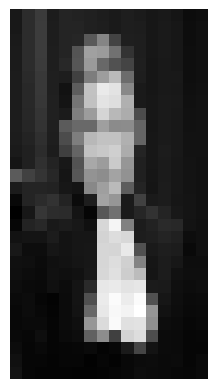

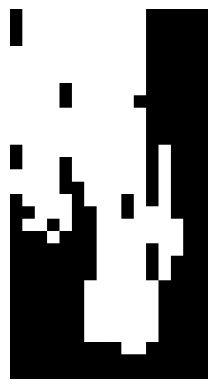

In [13]:
fname = "./images/ginsburg.jpg"
m = 30
n = 16
b = 14

p3_block(fname, m, n, b)